# Credit EDA Case study
#### Abhishek Kumar Singh, Karthik Balan
#### 31-05-2021

## Business Objective
### This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.
Two types of risks are associated with the bank’s decision:
1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the 
    company.
2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may 
    lead to a financial loss for the company.

In [1]:
#import required packages
import pandas as pd
from pandas.api.types import is_numeric_dtype
from pandas.api.types import is_object_dtype
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

import numpy as np
from itertools import combinations

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


### Step 1. Import Application Data

In [2]:
df_applications = pd.read_csv(r"D:\upgrad\eda\application_data.csv")

print("Shape of the data = {}".format(df_applications.shape))

df_applications.head()


Shape of the data = (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,-9461,-637,-3648.00,-2120,NaN,1,1,0,1,1,0,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.08,0.26,0.14,0.02,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.63,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,reg oper account,block of flats,0.01,"Stone, brick",No,2.00,2.00,2.00,2.00,-1134.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,-16765,-1188,-1186.00,-291,NaN,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,0.31,0.62,NaN,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.05,0.00,0.01,0.09,0.05,0.99,0.80,0.05,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.00,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.01,reg oper account,block of flats,0.07,Block,No,1.00,0.00,1.00,0.00,-828.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,-19046,-225,-4260.00,-2531,26.00,1,1,1,1,1,0,Laborers,1.00,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.56,0.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,-815.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.0

In [3]:
# basic information about loaded dataset
print(df_applications.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [4]:
print(df_applications.nunique().sort_values().reset_index())

                            index       0
0         LIVE_CITY_NOT_WORK_CITY       2
1                FLAG_DOCUMENT_18       2
2                FLAG_DOCUMENT_14       2
3                      FLAG_MOBIL       2
4                  FLAG_EMP_PHONE       2
5                 FLAG_WORK_PHONE       2
6                FLAG_CONT_MOBILE       2
7                      FLAG_PHONE       2
8                      FLAG_EMAIL       2
9                FLAG_DOCUMENT_15       2
10               FLAG_DOCUMENT_16       2
11               FLAG_DOCUMENT_17       2
12            EMERGENCYSTATE_MODE       2
13         REG_CITY_NOT_WORK_CITY       2
14         REG_CITY_NOT_LIVE_CITY       2
15     REG_REGION_NOT_LIVE_REGION       2
16               FLAG_DOCUMENT_19       2
17     REG_REGION_NOT_WORK_REGION       2
18               FLAG_DOCUMENT_20       2
19               FLAG_DOCUMENT_13       2
20                         TARGET       2
21             NAME_CONTRACT_TYPE       2
22                FLAG_DOCUMENT_2 

In [5]:
#removing id variable as it is of no use for EDA
_ = df_applications.pop("SK_ID_CURR")

### Step 2. Correct Datatypes for Variables (for atleast 10 columns)- 54 Variables identified for correction from Numeric to String Datatype

In [6]:
#correct data type for loaded variables,Check for unique value counts in each variable and merge variable datatype
var_unique_cnt = df_applications.nunique().reset_index()
var_unique_cnt.columns = ["var", "nunique"]

#look for all variables with <=10 distinct values and loaded as numeric,
#change these vars to string type for categories
vars_change_to_str = var_unique_cnt[(var_unique_cnt["nunique"] <= 10) & 
                                    (is_numeric_dtype(var_unique_cnt["nunique"]))]["var"].tolist()

print("Count of variables to change from Numeric to String Datatype = {}\n\n".format(len(vars_change_to_str)))
# vars_change_to_str
df_applications[vars_change_to_str] = df_applications[vars_change_to_str].applymap(str, na_action='ignore')
df_applications.info(verbose=1)

Count of variables to change from Numeric to String Datatype = 54


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 121 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    TARGET                        object 
 1    NAME_CONTRACT_TYPE            object 
 2    CODE_GENDER                   object 
 3    FLAG_OWN_CAR                  object 
 4    FLAG_OWN_REALTY               object 
 5    CNT_CHILDREN                  int64  
 6    AMT_INCOME_TOTAL              float64
 7    AMT_CREDIT                    float64
 8    AMT_ANNUITY                   float64
 9    AMT_GOODS_PRICE               float64
 10   NAME_TYPE_SUITE               object 
 11   NAME_INCOME_TYPE              object 
 12   NAME_EDUCATION_TYPE           object 
 13   NAME_FAMILY_STATUS            object 
 14   NAME_HOUSING_TYPE             object 
 15   REGION_POPULATION_RELATIVE    float64
 16   DAYS_BIRTH            

In [7]:
#check for variables with negative value and take absolute value
abs_vars = list(df_applications.select_dtypes('number').columns[(df_applications.select_dtypes('number') < 0).any()])
print(abs_vars)
print("""Since all of these variables are related to no. of Days gone since the activity, it has been showns as negative
     we can change these to positive by taking the absolute value""")

df_applications[abs_vars] = df_applications[abs_vars].abs()

['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']
Since all of these variables are related to no. of Days gone since the activity, it has been showns as negative
     we can change these to positive by taking the absolute value


### Step 3. Analysis for Variables with Missing values

In [8]:
#Find the percentage of missing values for all the columns
(100 * df_applications.isna().sum() / len(df_applications))

TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OWN_CAR_AGE                    65.99
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
O

In [9]:
#drop variables with over 13% missing data and finding the Imputation strategy for atleast 5 remaining variables

#step1- Data has "XNA" present for missing values, replace XNA with NaN to make data consistent
cat_cols = list(df_applications.select_dtypes('object').columns)
df_applications[cat_cols] = df_applications[cat_cols].replace("XNA", np.nan)

#keep columns with less than 13% Missing data, and for atleast 5 of these columns find the right Imputation strategy
vars_keep = (100 * df_applications.isna().sum() / len(df_applications)).reset_index()
vars_keep = vars_keep[vars_keep[0] <= 13]["index"].tolist()

df_applications = df_applications[vars_keep]
top_5_missing_vars = df_applications.isna().sum().sort_values().reset_index()
top_5_missing_vars = top_5_missing_vars[top_5_missing_vars[0]>0]
top_5_missing_vars.columns = ["Column", "Missing_Count"]
top_5_missing_vars.head()

,Column,Missing_Count
52,DAYS_LAST_PHONE_CHANGE,1
53,CNT_FAM_MEMBERS,2
54,CODE_GENDER,4
55,AMT_ANNUITY,12
56,AMT_GOODS_PRICE,278


### We are selecting following 5 variables for suggesting imputation strategy 
    DAYS_LAST_PHONE_CHANGE, CNT_FAM_MEMBERS, CODE_GENDER, AMT_ANNUITY, AMT_GOODS_PRICE

Total no. of observations missing for DAYS_LAST_PHONE_CHANGE are 1

Summary Statistics for the variable -
count   307510.00
mean       962.86
std        826.81
min          0.00
25%        274.00
50%        757.00
75%       1570.00
max       4292.00
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


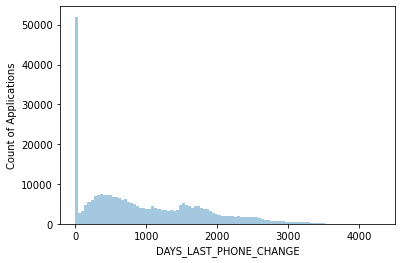


INFERENCE - There are two ways to handle this variable 
            since there is only one missing observation we may either just drop the observation or as seen in the graph 
            above "0" is the most frequent value, Therfore we may impute this variable using MODE of the variable i.e. 0


In [10]:
#1. Variable - DAYS_LAST_PHONE_CHANGE
#   Type of Variable - Continous
print("Total no. of observations missing for DAYS_LAST_PHONE_CHANGE are {}".format(df_applications.DAYS_LAST_PHONE_CHANGE.isna().sum()))
print("\nSummary Statistics for the variable -")
print(df_applications.DAYS_LAST_PHONE_CHANGE.describe())
plt.ylabel('Count of Applications')
sns.distplot(df_applications.DAYS_LAST_PHONE_CHANGE,bins=100,kde=False)
plt.show()
print("""\nINFERENCE - There are two ways to handle this variable 
            since there is only one missing observation we may either just drop the observation or as seen in the graph 
            above "0" is the most frequent value, Therfore we may impute this variable using MODE of the variable i.e. 0""")

Total no. of observations missing for CNT_FAM_MEMBERS are 2

Summary Statistics for the variable -
count   307509.00
mean         2.15
std          0.91
min          1.00
25%          2.00
50%          2.00
75%          3.00
max         20.00
Name: CNT_FAM_MEMBERS, dtype: float64


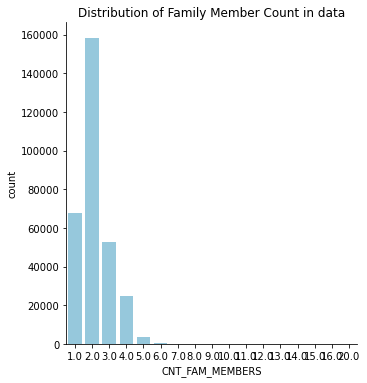


INFERENCE - For this variable since there is only two missing observation and as seen in the graph above -
                - We may either just remove the 2 observations
                - or replace with value 2 - being the MODE
     


In [11]:
#2. Variable - CNT_FAM_MEMBERS
#   Type of Variable - Continous
print("Total no. of observations missing for CNT_FAM_MEMBERS are {}".format(df_applications.CNT_FAM_MEMBERS.isna().sum()))
print("\nSummary Statistics for the variable -")
print(df_applications.CNT_FAM_MEMBERS.describe())
plot = sns.catplot(x="CNT_FAM_MEMBERS", kind="count", data=df_applications, saturation=.7, color='skyblue')
plt.title("Distribution of Family Member Count in data")
plt.show()
print("""\nINFERENCE - For this variable since there is only two missing observation and as seen in the graph above -
                - We may either just remove the 2 observations
                - or replace with value 2 - being the MODE
     """)

In [12]:
#3. Variable - CODE_GENDER
#   Type of Variable - Categerical
print("Total no. of observations missing for CODE_GENDER are {}\n".format(df_applications.CODE_GENDER.isna().sum()))
print("Distribution of percentage data by CODE_GENDER")
#check distribution of existing categories
print(100*df_applications.CODE_GENDER.value_counts(normalize=True))

print("""\nINFERENCE - As clearly seen there are almost double Female applicants compared to Males, therefore the best way to 
impute CODE_GENDER is as Female (value=F) """)

Total no. of observations missing for CODE_GENDER are 4

Distribution of percentage data by CODE_GENDER
F   65.84
M   34.16
Name: CODE_GENDER, dtype: float64

INFERENCE - As clearly seen there are almost double Female applicants compared to Males, therefore the best way to 
impute CODE_GENDER is as Female (value=F) 


Total no. of observations missing for AMT_ANNUITY are 12

Summary Statistics for the variable -
count   307499.00
mean     27108.57
std      14493.74
min       1615.50
25%      16524.00
50%      24903.00
75%      34596.00
max     258025.50
Name: AMT_ANNUITY, dtype: float64


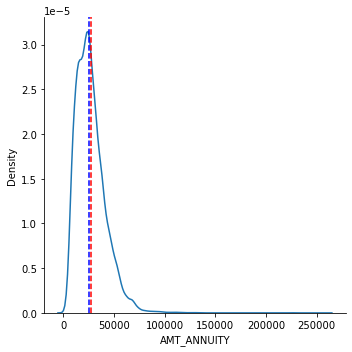


INFERENCE - It can be observed that values for this column are fairly distributed between the quantiles,
Also Mean and Median are very close (Minimum impact of outliers) making it behave almost like normal distribution, 
The distribution has high positive kurtosis making most of the value falling near the median.
Therefore we can impute this variable with median value for the variable, i.e. with value = 24903.


In [13]:
#4. Variable - AMT_ANNUITY
#   Type of Variable - Continous
print("Total no. of observations missing for AMT_ANNUITY are {}".format(df_applications.AMT_ANNUITY.isna().sum()))
print("\nSummary Statistics for the variable -")
print(df_applications.AMT_ANNUITY.describe())
mean = round(df_applications.AMT_ANNUITY.mean())
median = round(df_applications.AMT_ANNUITY.median())

sns.displot(df_applications, x="AMT_ANNUITY", kind="kde", bw_adjust=2)
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='b', linestyle='--')
plt.show()
print("""\nINFERENCE - It can be observed that values for this column are fairly distributed between the quantiles,
Also Mean and Median are very close (Minimum impact of outliers) making it behave almost like normal distribution, 
The distribution has high positive kurtosis making most of the value falling near the median.
Therefore we can impute this variable with median value for the variable, i.e. with value = {}.""".format(median))

Total no. of observations missing for AMT_GOODS_PRICE are 278

Summary Statistics for the variable -
count    307233.00
mean     538396.21
std      369446.46
min       40500.00
25%      238500.00
50%      450000.00
75%      679500.00
max     4050000.00
Name: AMT_GOODS_PRICE, dtype: float64


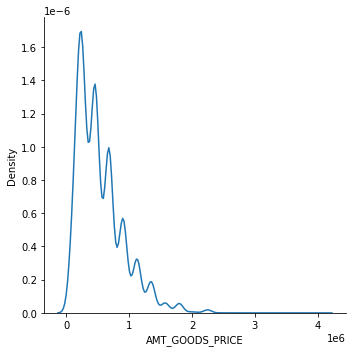

This variable shows much more variabilty and spread in data. So rather than simply using mean/median for imputation,
we must try other techniques. We are here trying correlation based imputation.

Find most Correlated variable and the coefficient
            level_0     level_1    0
66  AMT_GOODS_PRICE  AMT_CREDIT 0.99

We can see that the variable AMT_GOODS_PRICE is highly correlated to AMT_CREDIT, so we can use AMT_CREDIT 
to impute the variable AMT_GOODS_PRICE.
count   304527.00
mean         0.90
std          0.10
min          0.17
25%          0.83
50%          0.89
75%          1.00
max          6.67
dtype: float64

INFERENCE - Looking at the variable data, the suggested method of imputation is correlation based. 
using 0.9*AMT_CREDIT can best impute the variable AMT_GOODS_PRICE. It is also known that an applicant who owns
more pricey goods get more credit limits


In [14]:
#5. Variable - AMT_GOODS_PRICE
#   Type of Variable - Continous
print("Total no. of observations missing for AMT_GOODS_PRICE are {}".format(df_applications.AMT_GOODS_PRICE.isna().sum()))
print("\nSummary Statistics for the variable -")
print(df_applications.AMT_GOODS_PRICE.describe())

sns.displot(df_applications, x="AMT_GOODS_PRICE", kind="kde", bw_adjust=2)
plt.show()

print("""This variable shows much more variabilty and spread in data. So rather than simply using mean/median for imputation,
we must try other techniques. We are here trying correlation based imputation.""")

print("\nFind most Correlated variable and the coefficient")
var_corr = df_applications.dropna().corr().unstack().reset_index()
var_corr = var_corr[(var_corr.level_0 == "AMT_GOODS_PRICE") & (var_corr.level_1 != "AMT_GOODS_PRICE")]
var_corr[0] = var_corr[0].abs()
print(var_corr.sort_values(by=[0], ascending=False).head(1))

print("""\nWe can see that the variable AMT_GOODS_PRICE is highly correlated to AMT_CREDIT, so we can use AMT_CREDIT 
to impute the variable AMT_GOODS_PRICE.""")

#In order to determine the imputation strategy based on correlation, let us look at the AMT_GOODS_PRICE/AMT_CREDIT ratio 
#and see how most of the observations are behaving.

print((df_applications.dropna().AMT_GOODS_PRICE / df_applications.dropna().AMT_CREDIT).describe())
#we see that most of the observations have a ratio of 0.9

print("""\nINFERENCE - Looking at the variable data, the suggested method of imputation is correlation based. 
using 0.9*AMT_CREDIT can best impute the variable AMT_GOODS_PRICE. It is also known that an applicant who owns
more pricey goods get more credit limits""")

### Step 4. Analysis of atleast 5 continous variables for Outliers

Count of candidate numeric columns = 16


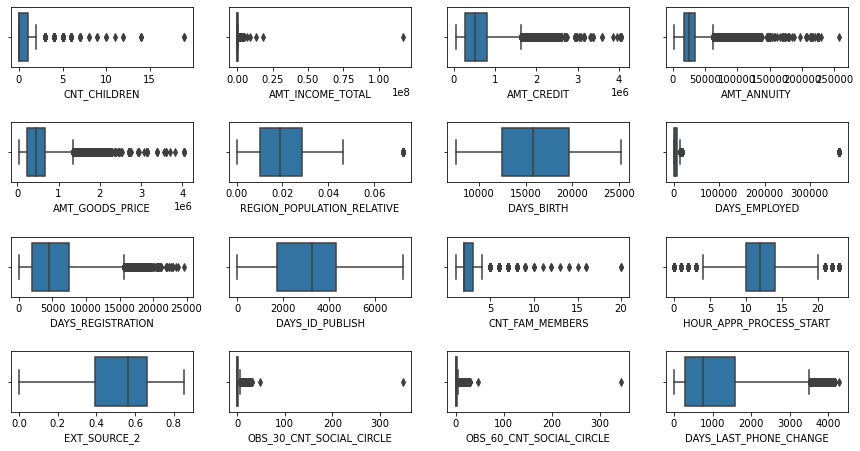

In [15]:
numeric_cols = list(df_applications.select_dtypes('number').columns)
print("Count of candidate numeric columns = {}".format(len(numeric_cols)))

#In order to select 5 variables having outliers, let us quickly draw a 4*4 grid of boxplots for each variable
fig, axes = plt.subplots(4, 4, figsize=(15, 15))
plt.subplots_adjust(top=0.5, hspace=0.9)
for idx, col in enumerate(numeric_cols):
    plot_row = idx//4
    plot_col = idx % 4
    sns.boxplot(x=col,data=df_applications, ax=axes[plot_row, plot_col])
plt.show()

### 5 Variables picked for Outlier treatment strategy
1. CNT_CHILDREN
2. DAYS_EMPLOYED
3. DAYS_REGISTRATION
4. OBS_30_CNT_SOCIAL_CIRCLE
5. OBS_60_CNT_SOCIAL_CIRCLE

In [16]:
#1. Variable - CNT_CHILDREN
# The chart above shows there are observations with >15 children, lets check how many
print("Rows with 15 or more CHILDREN = {}".format(len(df_applications[df_applications.CNT_CHILDREN >= 15])))

print("""\nINFERENCE - Since only 2 rows have over 15 children present the strategy to handle outlier could be 
to simply remove these rows""")

Rows with 15 or more CHILDREN = 2

INFERENCE - Since only 2 rows have over 15 children present the strategy to handle outlier could be 
to simply remove these rows


In [17]:
#2. Variable - DAYS_EMPLOYED
print("\nSummary Statistics for the variable - DAYS_EMPLOYED")
print(df_applications.DAYS_EMPLOYED.describe())
# The chart above shows that majority of applicants have DAYS_EMPLOYED in a defined range 
# and there are few who are far away from this, for most of the applicants the DAYS_EMPLOYED < 20000 days(around 55 years)
print("\nRows with >20000 DAYS_EMPLOYED= {}".format(len(df_applications[df_applications.DAYS_EMPLOYED >= 20000])))
print("\nDistribution of observartions >20000 DAYS_EMPLOYED")
print(df_applications[df_applications.DAYS_EMPLOYED > 20000].DAYS_EMPLOYED.describe())

print("""\nINFERENCE - There are 55374 observartions in data with unrealist value for DAYS_EMPLOYED present, 
Interestingly all of them have same value present as 365243, this could be assumed as either a data entry error
or a default value used for this variable to represent missing value. Strategy to handle this outlier could be to replace 
this max value of 365243 with either NAN or with median value of variable DAYS_EMPLOYED 
i.e. 2219 days if imputation is required as well""")




Summary Statistics for the variable - DAYS_EMPLOYED
count   307511.00
mean     67724.74
std     139443.75
min          0.00
25%        933.00
50%       2219.00
75%       5707.00
max     365243.00
Name: DAYS_EMPLOYED, dtype: float64

Rows with >20000 DAYS_EMPLOYED= 55374

Distribution of observartions >20000 DAYS_EMPLOYED
count    55374.00
mean    365243.00
std          0.00
min     365243.00
25%     365243.00
50%     365243.00
75%     365243.00
max     365243.00
Name: DAYS_EMPLOYED, dtype: float64

INFERENCE - There are 55374 observartions in data with unrealist value for DAYS_EMPLOYED present, 
Interestingly all of them have same value present as 365243, this could be assumed as either a data entry error
or a default value used for this variable to represent missing value. Strategy to handle this outlier could be to replace 
this max value of 365243 with either NAN or with median value of variable DAYS_EMPLOYED 
i.e. 2219 days if imputation is required as well



Summary Statistics for the variable - DAYS_REGISTRATION
count   307511.00
mean      4986.12
std       3522.89
min          0.00
25%       2010.00
50%       4504.00
75%       7479.50
max      24672.00
Name: DAYS_REGISTRATION, dtype: float64


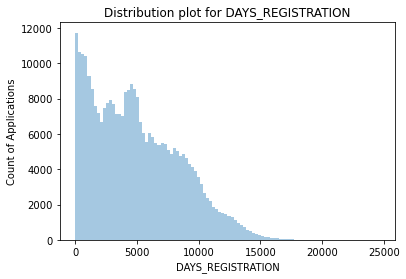


Checking the 99th and 100th percentile values in data
0.99   13879.00
1.00   24672.00
Name: DAYS_REGISTRATION, dtype: float64

Count of applications with DAYS_REGISTRATION>=15000 is 1219

INFERENCE - Looking at the analysis above, the strategy to handle outliers 
      for this variable should be to Cap values to 15000


In [18]:
#3. Variable - DAYS_REGISTRATION
print("\nSummary Statistics for the variable - DAYS_REGISTRATION")
print(df_applications.DAYS_REGISTRATION.describe())

plt.title("Distribution plot for DAYS_REGISTRATION")
sns.distplot(df_applications.DAYS_REGISTRATION,bins=100,kde=False)
plt.ylabel("Count of Applications")
plt.show()

print("\nChecking the 99th and 100th percentile values in data")
print(df_applications.DAYS_REGISTRATION.quantile([0.99, 1.0]))

print("\nCount of applications with DAYS_REGISTRATION>=15000 is {}"
      .format(len(df_applications[df_applications.DAYS_REGISTRATION >= 15000])))

print("""\nINFERENCE - Looking at the analysis above, the strategy to handle outliers 
      for this variable should be to Cap values to 15000""")

In [19]:
#4. Variable - OBS_30_CNT_SOCIAL_CIRCLE
print("\nSummary Statistics for the variable - OBS_30_CNT_SOCIAL_CIRCLE")
print(df_applications.OBS_30_CNT_SOCIAL_CIRCLE.describe())

print("""\n 
1. By the variable definition, it is the number of people in applicant's social circle 
who are defaulting payments for over 30 Days.
2. A value of 30 people and above seems very rare and unrealistic that an applicant has over 30 people in his social circle 
who are defaulting payments for over 30 Days.
3. There are only {} observations with > 30 value
""".format(len(df_applications[(df_applications.OBS_30_CNT_SOCIAL_CIRCLE > 30)])))

print("""\nINFERENCE -  There are only 2 observations with value over 30 that seems highly unlikely for this variable as per
its definition, Therefore we can simply remove the 2 observations from data for outlier treatment""")


Summary Statistics for the variable - OBS_30_CNT_SOCIAL_CIRCLE
count   306490.00
mean         1.42
std          2.40
min          0.00
25%          0.00
50%          0.00
75%          2.00
max        348.00
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

 
1. By the variable definition, it is the number of people in applicant's social circle 
who are defaulting payments for over 30 Days.
2. A value of 30 people and above seems very rare and unrealistic that an applicant has over 30 people in his social circle 
who are defaulting payments for over 30 Days.
3. There are only 2 observations with > 30 value


INFERENCE -  There are only 2 observations with value over 30 that seems highly unlikely for this variable as per
its definition, Therefore we can simply remove the 2 observations from data for outlier treatment


In [20]:
#4. Variable - OBS_60_CNT_SOCIAL_CIRCLE
print("\nSummary Statistics for the variable - OBS_60_CNT_SOCIAL_CIRCLE")
print(df_applications.OBS_60_CNT_SOCIAL_CIRCLE.describe())

print("""\n 
1. By the variable definition, it is the number of people in applicant's social circle 
who are defaulting payments for over 60 Days.
2. A value of 30 people and above seems very rare and unrealistic that an applicant has over 30 people in his social circle 
who are defaulting payments for over 60 Days.
3. There are only {} observations with > 30 value
""".format(len(df_applications[(df_applications.OBS_60_CNT_SOCIAL_CIRCLE > 30)])))

print("""\nINFERENCE -  There are only 2 observations with value over 30 that seems highly unlikely for this variable as per
its definition, Therefore we can simply remove the 2 observations from data for outlier treatment""")


Summary Statistics for the variable - OBS_60_CNT_SOCIAL_CIRCLE
count   306490.00
mean         1.41
std          2.38
min          0.00
25%          0.00
50%          0.00
75%          2.00
max        344.00
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

 
1. By the variable definition, it is the number of people in applicant's social circle 
who are defaulting payments for over 60 Days.
2. A value of 30 people and above seems very rare and unrealistic that an applicant has over 30 people in his social circle 
who are defaulting payments for over 60 Days.
3. There are only 2 observations with > 30 value


INFERENCE -  There are only 2 observations with value over 30 that seems highly unlikely for this variable as per
its definition, Therefore we can simply remove the 2 observations from data for outlier treatment


### Step 5. Binning for atleast 2 Columns

#### Variables selected for binning
1. DAYS_BIRTH -  Converting DAYS_BIRTH to age(years) and binning the age like [1, 10, 20, 30, 40, 50, 60, 70, 70+]. Binning this variable could help in better utilization of this variable because average value of a category would represent data much concrete than individual age numbers.


2. HOUR_APPR_PROCESS_START - Hour(time) of the day on 24 hour scale when application was started. Since 24:00 hours and 1:00 hours are very near on a clock but simply looking at the values it looks very different in magnitude, therefore it is good to bin this variable to bins like ["Early_Morning", "Morning", "Afternoon", "Evening", "Late_Evening, "Night", "Late_Night"] for better analysis.

Binning variable DAYS_BIRTH


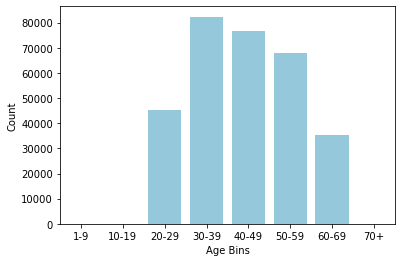

------------------------------------------------------------------------------------------------------------------------

Binning variable HOUR_APPR_PROCESS_START



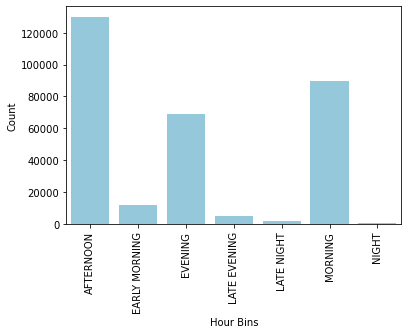

In [21]:
print("Binning variable DAYS_BIRTH")
age = pd.cut((df_applications['DAYS_BIRTH']/365.25), [1,10,20,30,40,50,60,70,200], labels=["1-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70+"]).reset_index()
age = age.groupby("DAYS_BIRTH")["index"].count().reset_index()
sns.barplot(data = age, x="DAYS_BIRTH", y="index", color='skyblue', saturation=0.7)
plt.xlabel("Age Bins")
plt.ylabel("Count")
plt.show()

print("-"*120)
print("\nBinning variable HOUR_APPR_PROCESS_START\n")

#create a function to convert hours to hour bins
def hoursToBins(hour):
    if hour >=4 and hour < 7:
        return "EARLY MORNING"
    elif hour >=7 and hour < 11:
        return "MORNING"
    elif hour >=11 and hour < 15:
        return "AFTERNOON"
    elif hour >=15 and hour < 19:
        return "EVENING"
    elif hour >=19 and hour < 21:
        return "LATE EVENING"
    elif hour >=21 and hour <= 24:
        return "NIGHT"
    elif hour >=1 and hour < 4:
        return "LATE NIGHT"
    

hour_bin = df_applications["HOUR_APPR_PROCESS_START"].apply(hoursToBins).reset_index()
hour_bin = hour_bin.groupby("HOUR_APPR_PROCESS_START").count().reset_index()
sns.barplot(data = hour_bin, x="HOUR_APPR_PROCESS_START", y="index", color='skyblue', saturation=0.7)
plt.xlabel("Hour Bins")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


### Step 6. Check the Imbalance percentage for TARGET class

In [22]:
100 * df_applications.TARGET.value_counts(normalize=True)

0   91.93
1    8.07
Name: TARGET, dtype: float64

### Step 7. Univariate Analysis for -
- Categorical Columns
- Continuous Columns

In [23]:
# Divide data in to two different dataframes for each TARGET class
df_1 = df_applications[df_applications.TARGET == "1"]
df_0 = df_applications[df_applications.TARGET == "0"]

df_0.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
1,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,16765,1188,1186.00,291,1,1,0,1,1,0,2.00,1,1,MONDAY,11,0,0,0,0,0,0,0.62,1.00,0.0,1.00,0.0,828.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,19046,225,4260.00,2531,1,1,1,1,1,0,1.00,2,2,MONDAY,9,0,0,0,0,0,0,0.56,0.00,0.0,0.00,0.0,815.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,Cash loans,F,N,Y,0,135000.00,312682.50,29686.50,297000.00,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.01,19005,3039,9833.00,2437,1,1,0,1,0,0,2.00,2,2,WEDNESDAY,17,0,0,0,0,0,0,0.65,2.00,0.0,2.00,0.0,617.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,513000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.03,19932,3038,4311.00,3458,1,1,0,1,0,0,1.00,2,2,THURSDAY,11,0,0,0,0,1,1,0.32,0.00,0.0,0.00,0.0,1106.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,Cash loans,M,N,Y,0,99000.00,490495.50,27517.50,454500.00,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.04,16941,1588,4970.00,477,1,1,1,1,1,0,2.00,2,2,WEDNESDAY,16,0,0,0,0,0,0,0.35,0.00,0.0,0.00,0.0,2536.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
cols_categorical = list(df_0.select_dtypes('object').columns)
cols_categorical.remove('TARGET')
cols_continous = list(df_0.select_dtypes('number').columns)

Representing TARGET=0 as Blue and TARGET=1 as Red


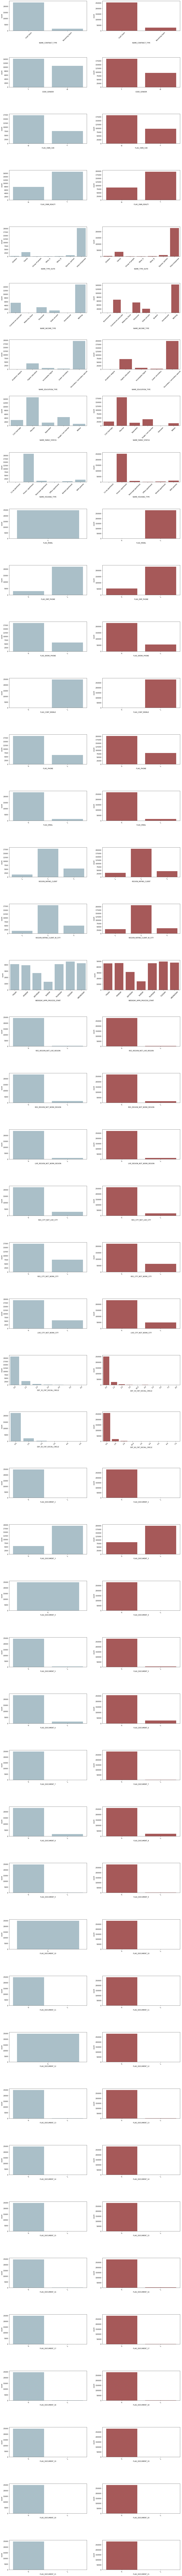

In [25]:
# Univariate analysis on categorical columns
fig, axes = plt.subplots(len(cols_categorical), 2, figsize=(20,300))
plt.subplots_adjust(top=0.9, hspace=0.9)
print("Representing TARGET=0 as Blue and TARGET=1 as Red")
for idx, col in enumerate(cols_categorical):
    sns.countplot(df_1[col].sort_values(), ax=axes[idx, 0], color='skyblue', saturation=0.3)
    sns.countplot(df_0[col].sort_values(), ax=axes[idx, 1], color='red', saturation=0.3)
    axes[idx, 0].tick_params(axis='x', labelrotation=45)
    axes[idx, 1].tick_params(axis='x', labelrotation=45)
plt.show()

#### INFERENCE -  From Univariate analysis on Categorical Columns - By looking at all the charts above for all the variables, Following variable seems to differ noticably between TARGET=1 and TARGET=0, and therefore are important for deriving the independent variable TARGET. Though there are other variables too we are only considering 5 variables here.
1. CODE_GENDER - Males have less defaults(TARGET=1) compared to Females
2. FLAG_OWN_CAR - People who own a car are more likely to default(TARGET=1)
3. NAME_INCOME_TYPE - Categories like Pensioners are more likely to default(TARGET=1), this variable can be further tested for importance during Categorical-Continuos bivariate analysis
4. FLAG_EMP_PHONE - Applicants who do not provide Employer Phone number are more likely to default(TARGET=1)
5. REG_CITY_NOT_LIVE_CITY - Applicants whose Permanent address does not match Contact address are more likely to make defaults(TARGET=1)

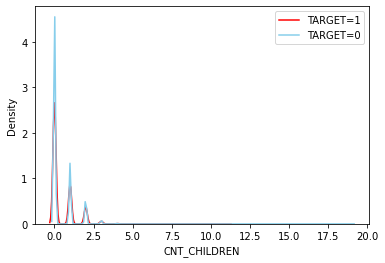

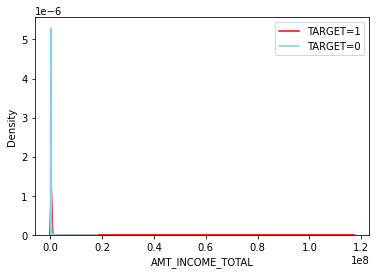

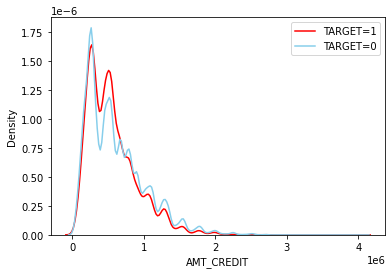

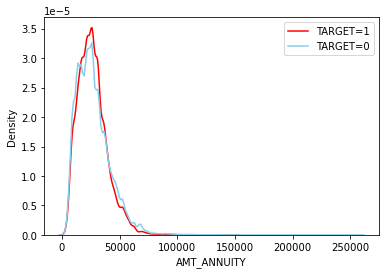

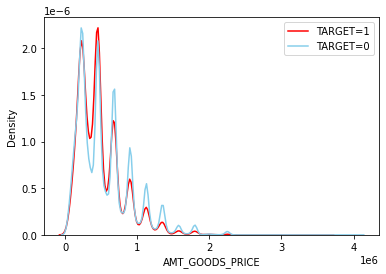

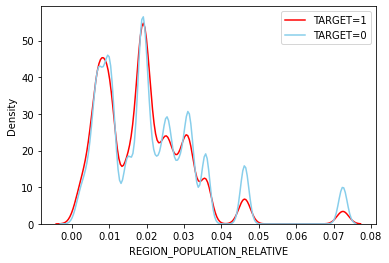

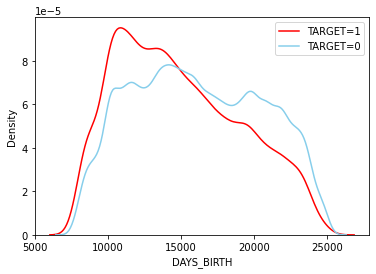

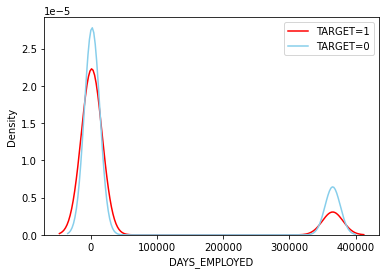

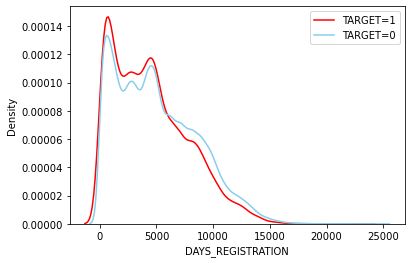

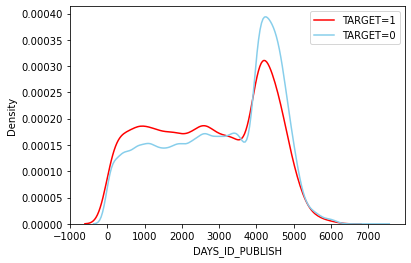

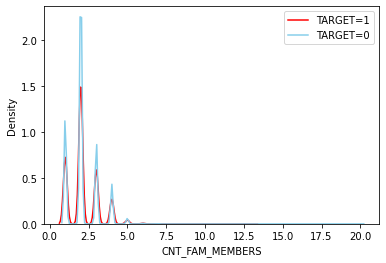

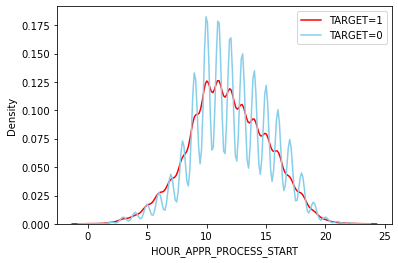

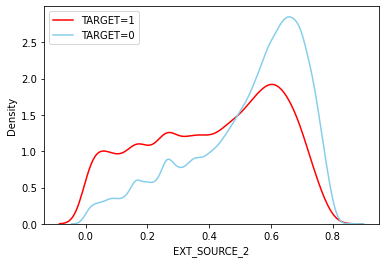

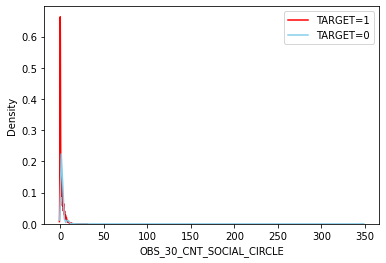

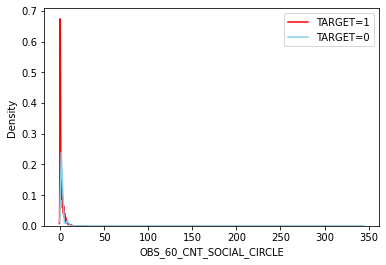

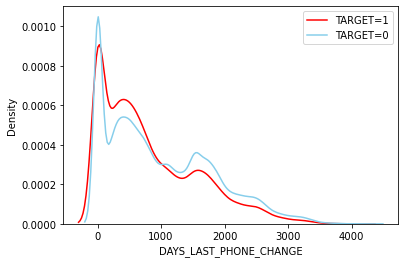

In [26]:
#Univariate analysis for continous variables
for col in cols_continous:
    sns.distplot(df_1[col], hist =False, label = 'TARGET=1', color="red")
    sns.distplot(df_0[col], hist = False, label = 'TARGET=0', color="skyblue")
    plt.legend()
    plt.show()


#### INFERENCE - From Univariate analysis on Continous Columns
DAYS_BIRTH(Age) seems to be one variable which varies for TARGET variable classes(0 and 1) and it's definition is also very clear.

### Step 7. Bivariate Analysis for -
- Categorical-Categorical
- Categorical-Continuous
- Continuous-Continuous

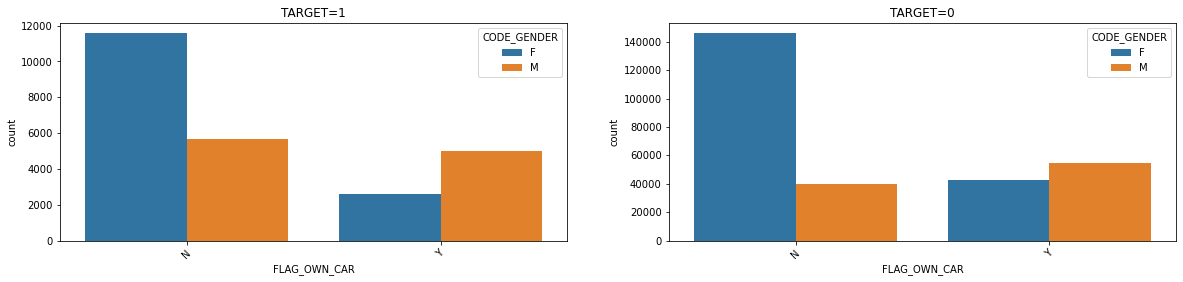

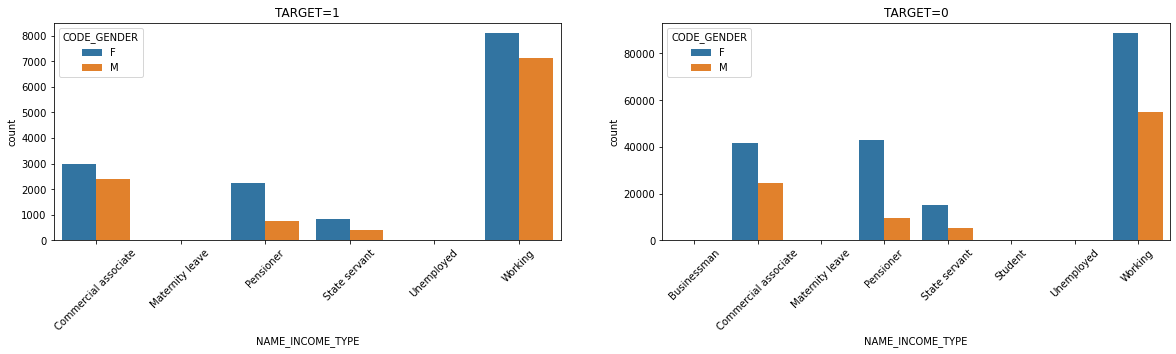

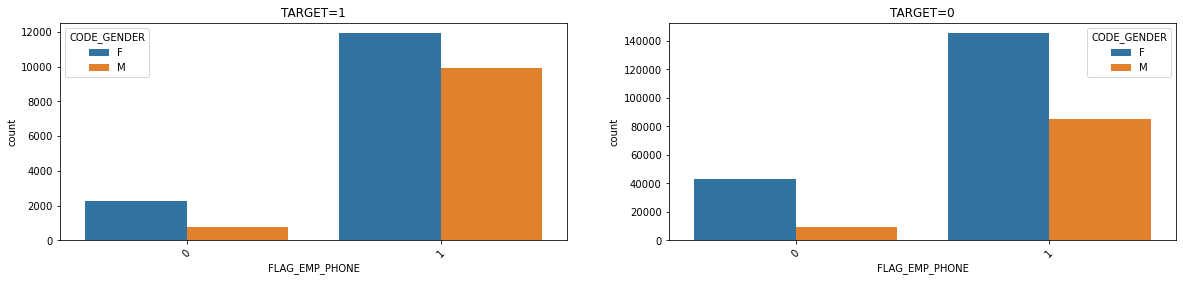

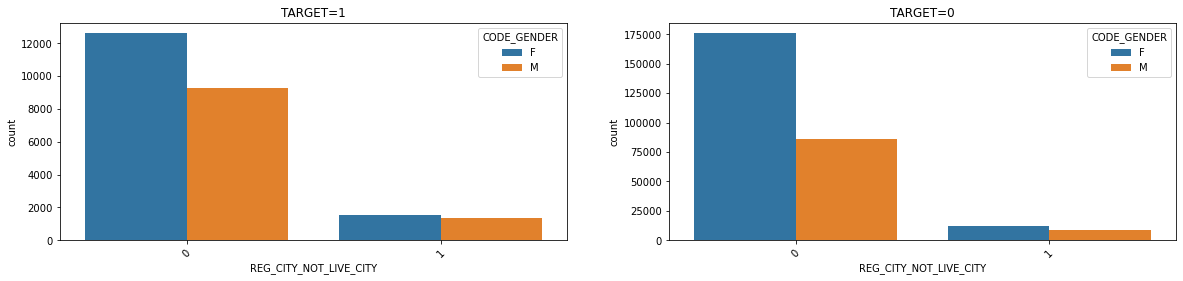

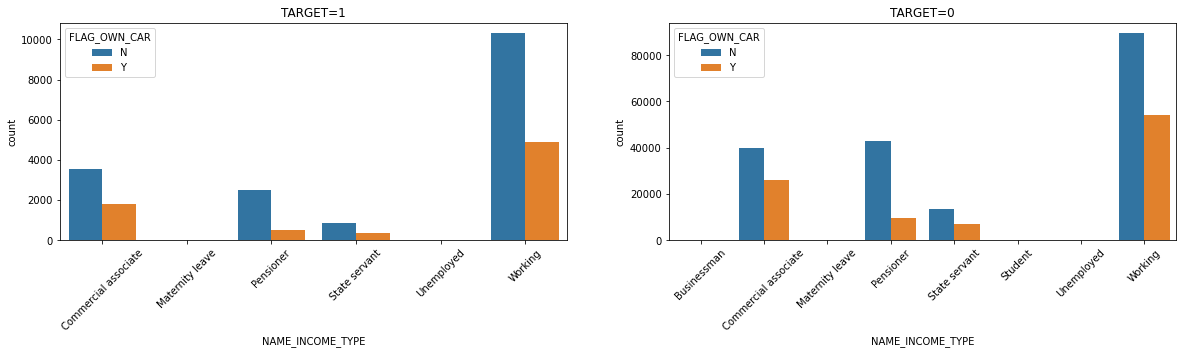

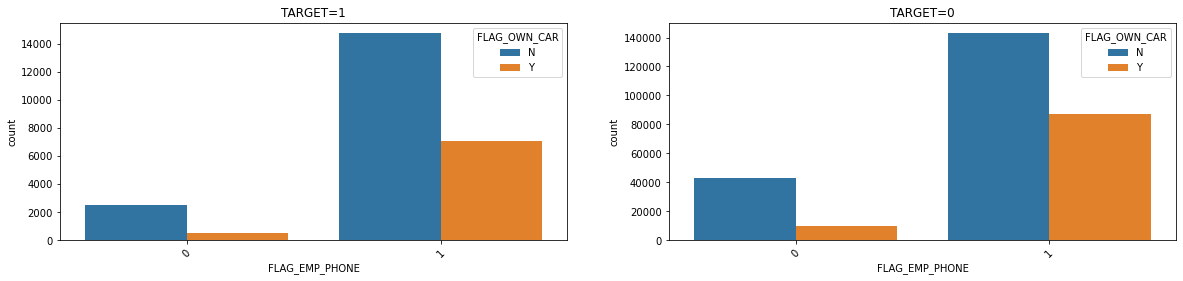

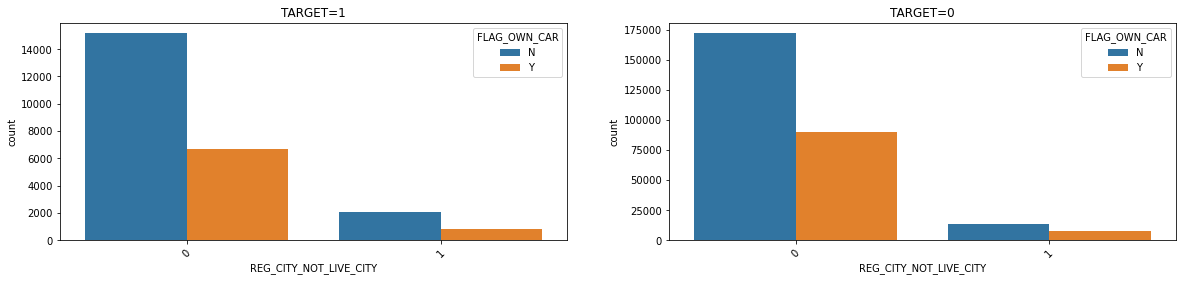

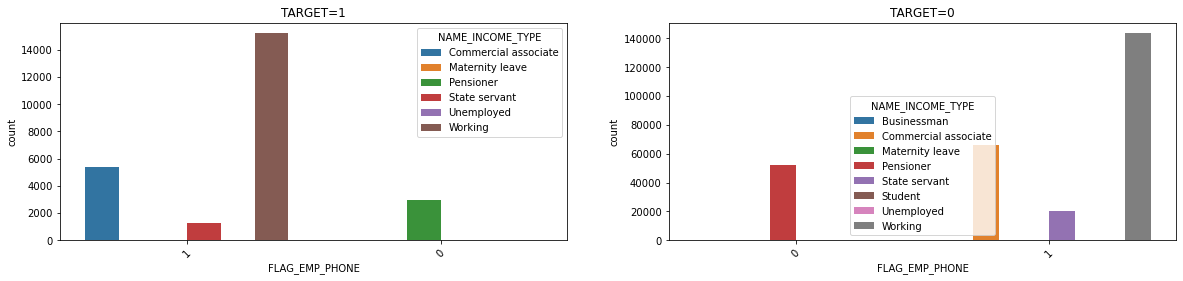

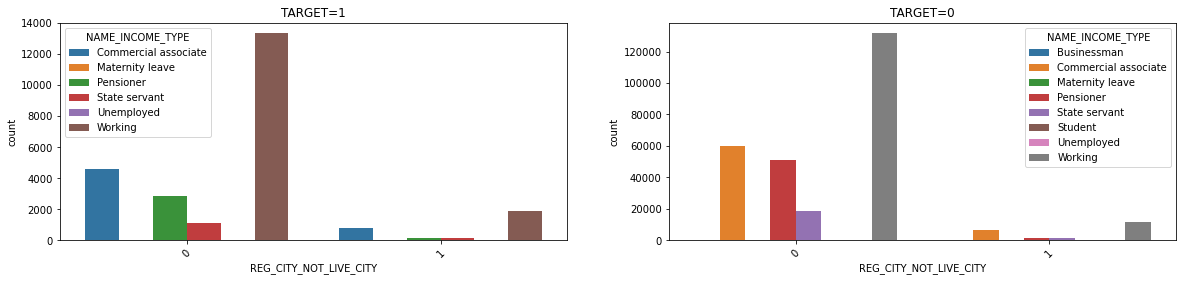

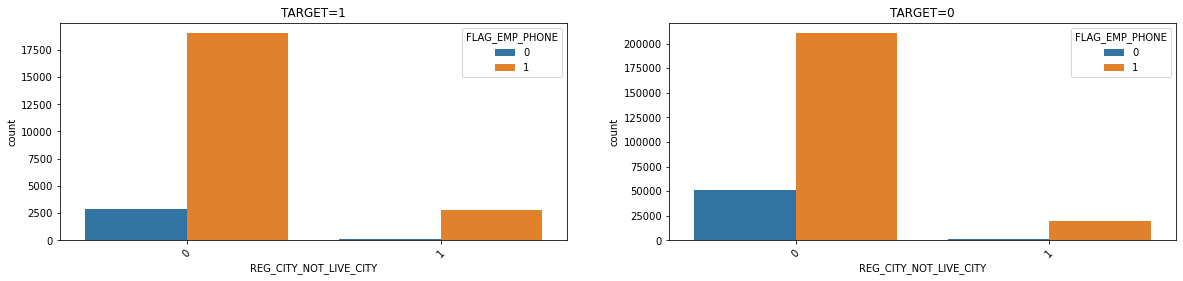

In [27]:
#Bivariate analysis for Categorical-Categorical variables
sel_cat_vars = ["CODE_GENDER", "FLAG_OWN_CAR", "NAME_INCOME_TYPE", "FLAG_EMP_PHONE", "REG_CITY_NOT_LIVE_CITY"]
for idx, col1 in enumerate(sel_cat_vars):
    for col2 in sel_cat_vars[idx+1:]:
        if col1 == col2:
            continue
        plt.figure(figsize = (20,4))
        plt.subplot(1,2,1)
        plt.title("TARGET=1")
        sns.countplot(col2, hue = col1, data=df_1.sort_values(by=[col1, col2]))
        plt.xticks(rotation=45)

        plt.subplot(1,2,2)
        plt.title('TARGET=0')
        sns.countplot(col2, hue = col1, data=df_0.sort_values(by=[col1, col2]))
        plt.xticks(rotation=45)
        plt.show()
        

#### INFERENCE - From Bivariate analysis on Categorical-Categorical Columns
1. CODE_GENDER - 
                    - FLAG_OWN_CAR- Males who do not own a car are more likely to default
                    - NAME_INCOME_TYPE- Working professional who own a car are less likely to default
                    
2. FLAG_OWN_CAR - 
                    - FLAG_EMP_PHONE - Candidates who own a car and have also provided the employer phone number are less 
                    likely to default

<AxesSubplot:title={'center':'TARGET=0'}>

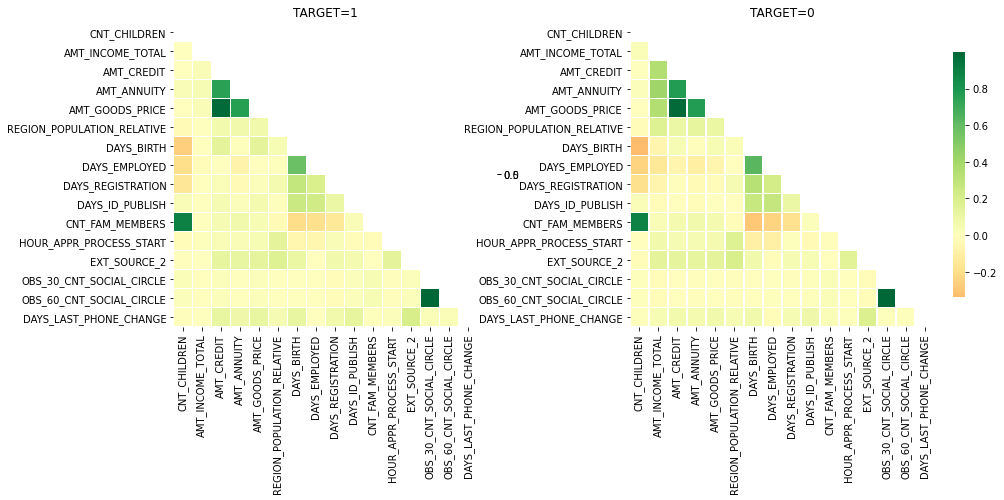

In [28]:
#Bivariate analysis for Continous-Continous variables
corr1 = df_1.corr()
corr0 = df_0.corr()
mask = np.triu(np.ones_like(corr1, dtype=bool))
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.title("TARGET=1")
sns.heatmap(corr1, mask=mask, cmap='RdYlGn', center=0, square=True, linewidths=.5, cbar_kws={"shrink": 0})

plt.subplot(1,2,2)
plt.title("TARGET=0")
sns.heatmap(corr0, mask=mask, cmap='RdYlGn', center=0, square=True, linewidths=.5, cbar_kws={"shrink": .3})


In [29]:
#finding highly correlated continous variables
print("Correlations for TARGET=1\n")
corr1 = df_1.corr()
corr_df = corr1.where(np.triu(np.ones(corr1.shape), k=1).astype(np.bool))
corr_df = corr_df.unstack().reset_index()
corr_df[0] = corr_df[0].abs()
print(corr_df[corr_df[0]>= 0.5])

print("\nCorrelations for TARGET=0\n")
corr0 = df_0.corr()
corr_df = corr0.where(np.triu(np.ones(corr0.shape), k=1).astype(np.bool))
corr_df = corr_df.unstack().reset_index()
corr_df[0] = corr_df[0].abs()
print(corr_df[corr_df[0]>= 0.5])

Correlations for TARGET=1

                      level_0                   level_1    0
50                AMT_ANNUITY                AMT_CREDIT 0.75
66            AMT_GOODS_PRICE                AMT_CREDIT 0.98
67            AMT_GOODS_PRICE               AMT_ANNUITY 0.75
118             DAYS_EMPLOYED                DAYS_BIRTH 0.58
160           CNT_FAM_MEMBERS              CNT_CHILDREN 0.89
237  OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE 1.00

Correlations for TARGET=0

                      level_0                   level_1    0
50                AMT_ANNUITY                AMT_CREDIT 0.77
66            AMT_GOODS_PRICE                AMT_CREDIT 0.99
67            AMT_GOODS_PRICE               AMT_ANNUITY 0.78
118             DAYS_EMPLOYED                DAYS_BIRTH 0.63
160           CNT_FAM_MEMBERS              CNT_CHILDREN 0.88
237  OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE 1.00


#### INFERENCE - From Bivariate analysis on Continous-Continous Columns
1. Identified variables with over 0.5 correlation coefficient
2. We can observe that most of the variables show very similar correlation between TARGET 1 and 0 except variable AMT_INCOME_TOTAL where it seems to be more correlated to variable AMT_CREDIT, AMT_ANNUITY and AMT_GOODS_PRICE when TARGET=0.This means when Credited amount is based on total income and amount of goods an applicant owns there are less chances of a default.
3. Explaining high correlations based on column descriptions

    - AMT_CREDIT and AMT_ANNUITY - This is explainable, most of the high amount loans are paid over a longer period of time
    
    - AMT_CREDIT and AMT_GOODS_PRICE - Loan amount are mostly decided based on how much a person is worth, so more the amount of goods a person owns, more the credit amount to the loan
    
    - DAYS_EMPLOYED and DAYS_BIRTH - Age and employment tenure are highly correlated and it makes sense
    
    - CNT_FAM_MEMBERS and CNT_CHILDREN - More the no. of children more will be the no. of family members, clearly visible in correlation as well


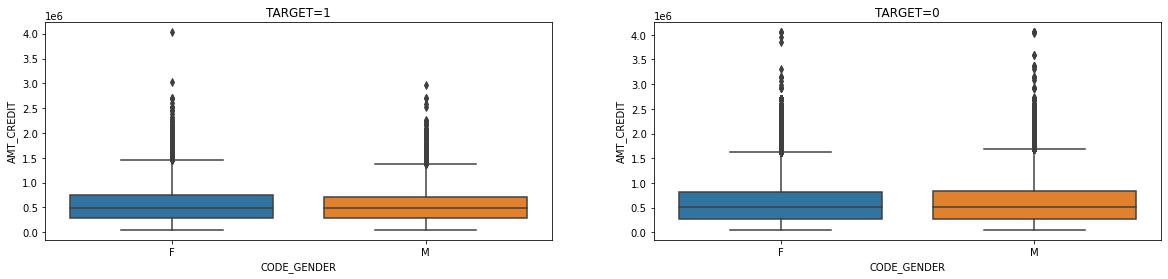

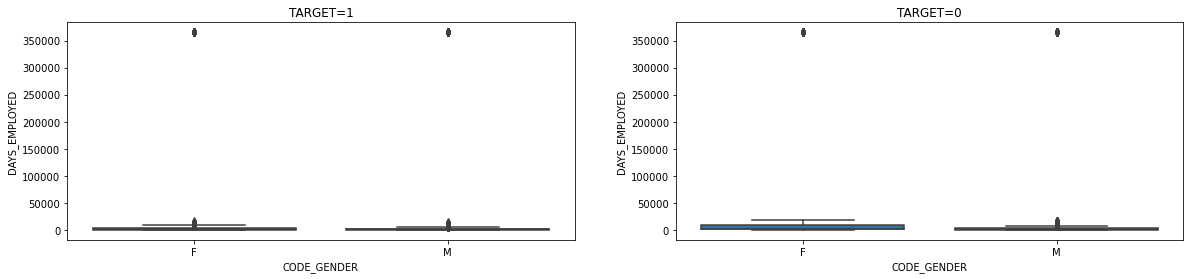

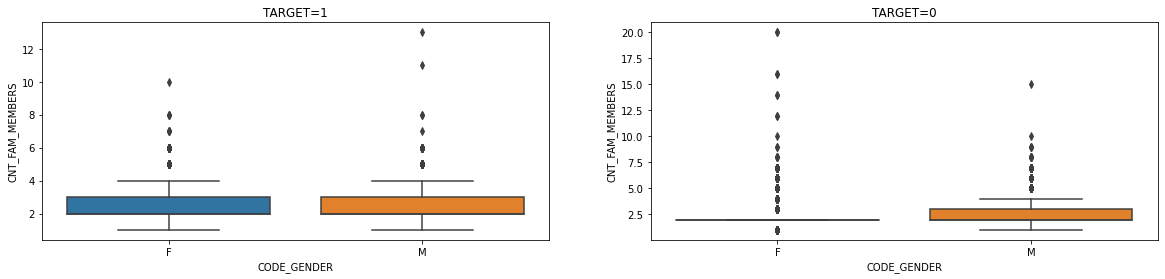

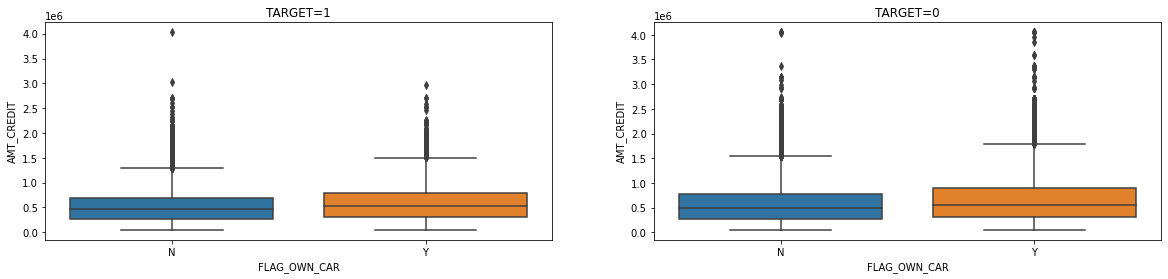

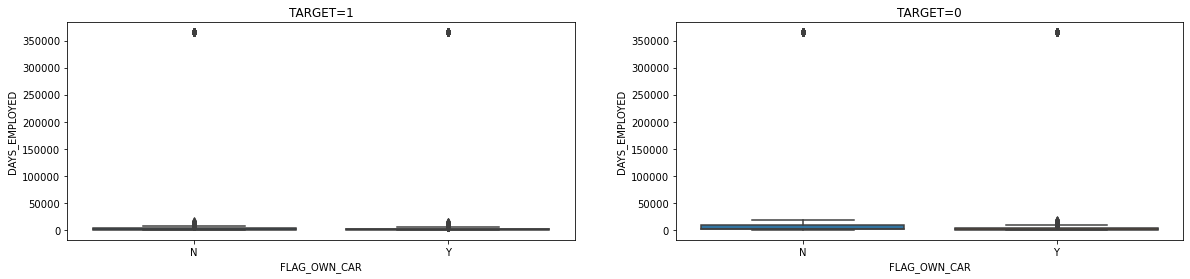

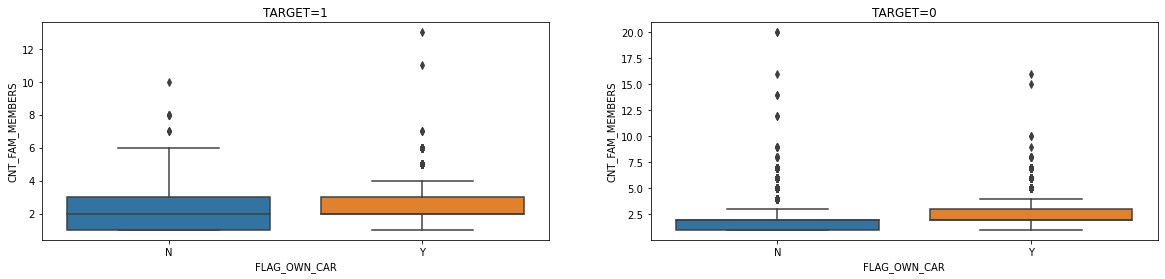

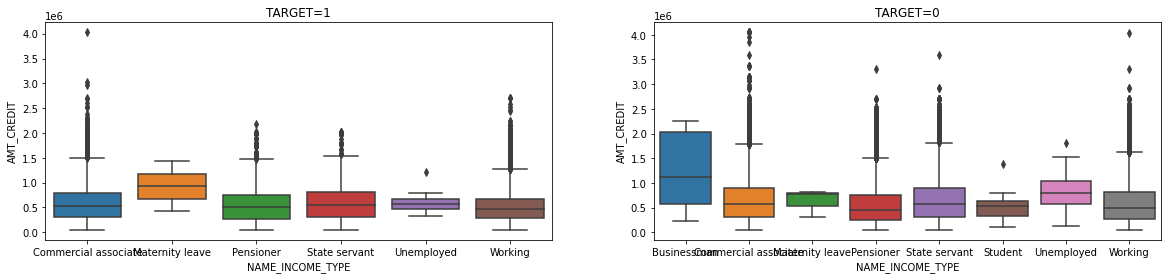

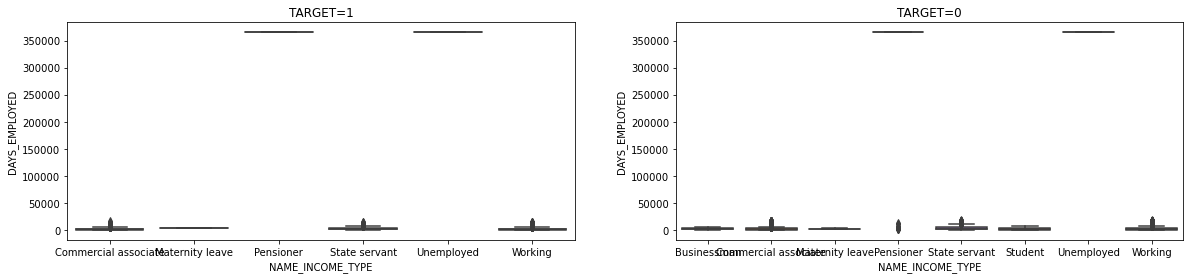

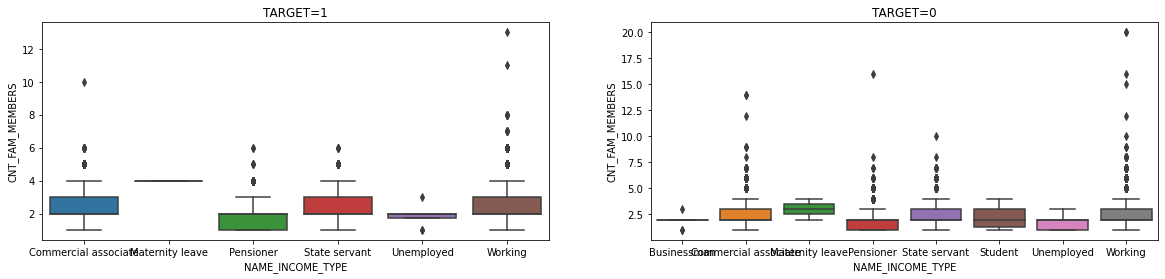

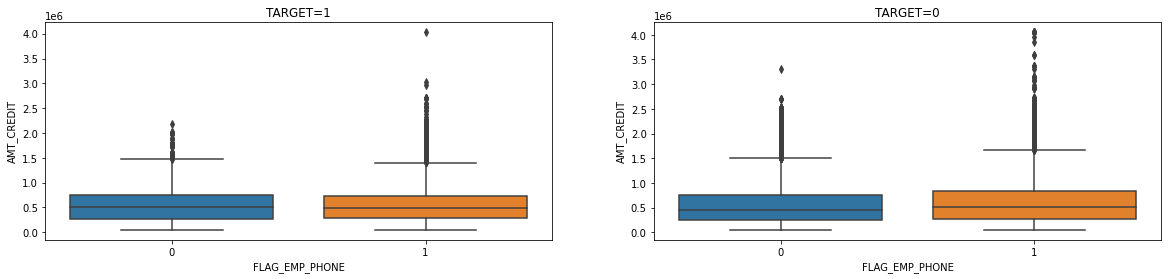

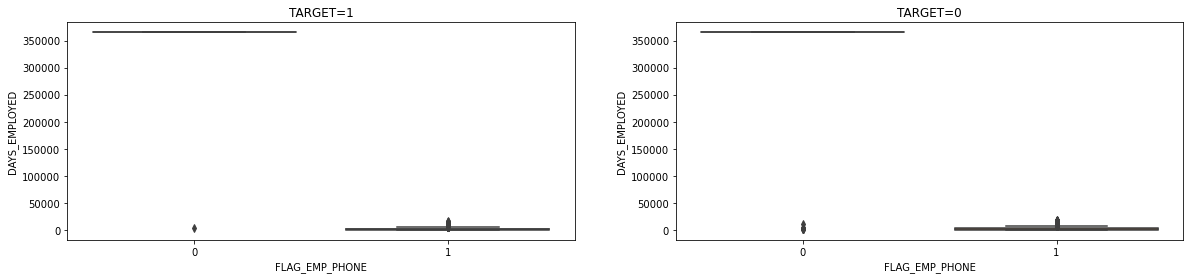

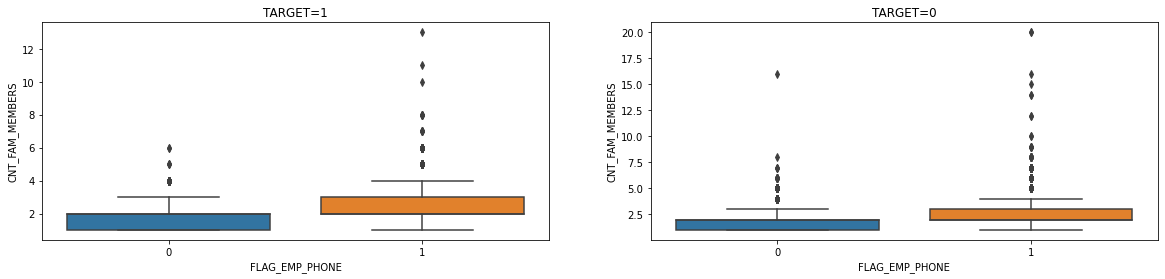

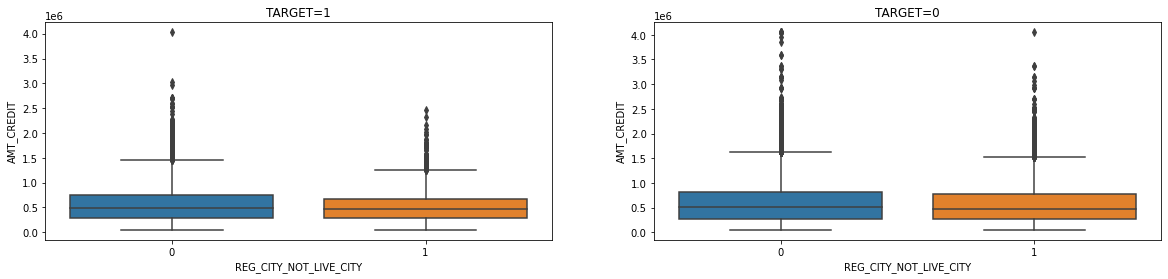

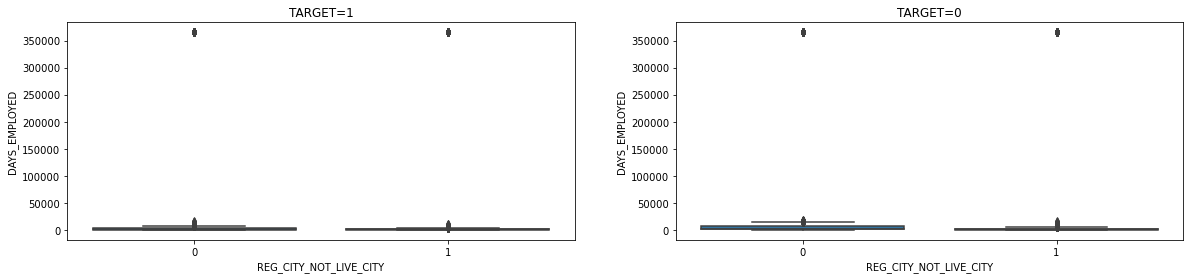

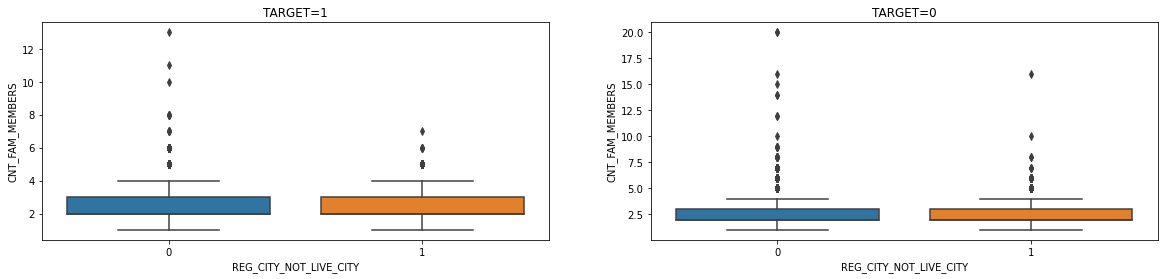

In [30]:
#Bivariate analysis for Continous-Categorical variables
for cat in sel_cat_vars:
    for cont in ["AMT_CREDIT", "DAYS_EMPLOYED", "CNT_FAM_MEMBERS"]:
        plt.figure(figsize = (20,4))
        plt.subplot(1,2,1)
        plt.title("TARGET=1")
        sns.boxplot(x = cat, y = cont, data =df_1.sort_values(by=[cat,cont]))

        plt.subplot(1,2,2)
        plt.title("TARGET=0")
        sns.boxplot(x = cat, y = cont, data =df_0.sort_values(by=[cat,cont]))
        plt.show()

#### INFERENCE - From Bivariate analysis on Continous-Categorical Columns
- Female applicants with more than 2 family members are more likely to default compared to applicants with a family of 2 or less
- Smaller families(<=2) who do not own a car are more likely to default

### Step 8.  Merging Application and Previous Application Data- Extra Task
- There is a 1:N relationship i.e. one current application has multiple previous applications data available
- This makes it tricky to join the two datasets. Although we can create a lot of new variables by joining and aggregating previous data, The approach we have decided is to keep it simple by using the latest previous application data and the count of previous applications as a new variable to join and do the analysis
- For distinguishing between current and previous application columns we will be prefixing "PREV_" to all columns from previous application
- Finally we will do univariate and bivariate analysis for a few columns from previous application data.


In [31]:
# read current and previous application data
df_applications1 = pd.read_csv(r"D:\upgrad\eda\application_data.csv")
df_applications1 = df_applications1[["SK_ID_CURR", "TARGET"]] #take only ID variable for join and TARGET from current application

df_previous = pd.read_csv(r"D:\upgrad\eda\previous_application.csv")

#check if there are more than one previous applications corresponding to a current application
print(df_previous.shape)
print(df_previous.drop_duplicates("SK_ID_CURR").shape)

#Create the previous application counts variable
df_previous_count = df_previous[["SK_ID_CURR", "SK_ID_PREV"]].groupby("SK_ID_CURR").count().reset_index()
df_previous_count.columns = ["SK_ID_CURR", "PREV_APP_COUNT"]

# Remove duplicates from previous application data on current application ID and take the latest previous application data
df_previous = df_previous.sort_values('DAYS_DECISION').drop_duplicates("SK_ID_CURR", keep='last')

# In order to easily identify variables from previous application during our analysis, we will be using PREV_ prefix for all 
# columns from previous application data

df_previous.columns = ["PREV_" + x if x != "SK_ID_CURR" else x for x in df_previous.columns]

#drop the PREV_SK_ID_PREV column as it is just an id for previous application
_ = df_previous.pop("PREV_SK_ID_PREV")

# left join the datsets for current and previous application data and previous application counts
df_data = df_applications1.merge(df_previous, how="left", on="SK_ID_CURR").merge(df_previous_count, how="left", on="SK_ID_CURR")

#now we can remove the ID variable SK_ID_CURR
_ = df_data.pop("SK_ID_CURR")
#replace "XNA" value as NaN
df_data = df_data.replace("XNA", np.nan)
df_data.head()

(1670214, 37)
(338857, 37)


,TARGET,PREV_NAME_CONTRACT_TYPE,PREV_AMT_ANNUITY,PREV_AMT_APPLICATION,PREV_AMT_CREDIT,PREV_AMT_DOWN_PAYMENT,PREV_AMT_GOODS_PRICE,PREV_WEEKDAY_APPR_PROCESS_START,PREV_HOUR_APPR_PROCESS_START,PREV_FLAG_LAST_APPL_PER_CONTRACT,PREV_NFLAG_LAST_APPL_IN_DAY,PREV_RATE_DOWN_PAYMENT,PREV_RATE_INTEREST_PRIMARY,PREV_RATE_INTEREST_PRIVILEGED,PREV_NAME_CASH_LOAN_PURPOSE,PREV_NAME_CONTRACT_STATUS,PREV_DAYS_DECISION,PREV_NAME_PAYMENT_TYPE,PREV_CODE_REJECT_REASON,PREV_NAME_TYPE_SUITE,PREV_NAME_CLIENT_TYPE,PREV_NAME_GOODS_CATEGORY,PREV_NAME_PORTFOLIO,PREV_NAME_PRODUCT_TYPE,PREV_CHANNEL_TYPE,PREV_SELLERPLACE_AREA,PREV_NAME_SELLER_INDUSTRY,PREV_CNT_PAYMENT,PREV_NAME_YIELD_GROUP,PREV_PRODUCT_COMBINATION,PREV_DAYS_FIRST_DRAWING,PREV_DAYS_FIRST_DUE,PREV_DAYS_LAST_DUE_1ST_VERSION,PREV_DAYS_LAST_DUE,PREV_DAYS_TERMINATION,PREV_NFLAG_INSURED_ON_APPROVAL,PREV_APP_COUNT
0,1,Consumer loans,9251.77,179055.00,179055.00,0.00,179055.00,SATURDAY,9.00,Y,1.00,0.00,NaN,NaN,XAP,Approved,-606.00,NaN,XAP,NaN,New,Vehicles,POS,NaN,Stone,500.00,Auto technology,24.00,low_normal,POS other with interest,365243.00,-565.00,125.00,-25.00,-17.00,0.00,1.00
1,0,Cash loans,98356.99,900000.00,1035882.00,NaN,900000.00,FRIDAY,12.00,Y,1.00,NaN,NaN,NaN,NaN,Approved,-746.00,NaN,XAP,Unaccompanied,Repeater,NaN,Cash,x-sell,Credit and cash offices,-1.00,NaN,12.00,low_normal,Cash X-Sell: low,365243.00,-716.00,-386.00,-536.00,-527.00,1.00,3.00
2,0,Consumer loans,5357.25,24282.00,20106.00,4860.00,24282.00,FRIDAY,5.00,Y,1.00,0.21,NaN,NaN,XAP,Approved,-815.00,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,NaN,Regional / Local,30.00,Connectivity,4.00,middle,POS mobile without interest,365243.00,-784.00,-694.00,-724.00,-714.00,0.00,1.00
3,0,Cash loans,NaN,0.00,0.00,NaN,NaN,THURSDAY,15.00,Y,1.00,NaN,NaN,NaN,NaN,Canceled,-181.00,NaN,XAP,NaN,Repeater,NaN,NaN,NaN,Credit and cash offices,-1.00,NaN,NaN,NaN,Cash,NaN,NaN,NaN,NaN,NaN,NaN,9.00
4,0,Cash loans,16037.64,247500.00,274288.50,NaN,247500.00,MONDAY,11.00,Y,1.00,NaN,NaN,NaN,NaN,Approved,-374.00,Cash through the bank,XAP,NaN,Repeater,NaN,Cash,x-sell,Credit and cash offices,-1.00,NaN,24.00,middle,Cash X-Sell: middle,365243.00,-344.00,346.00,365243.00,365243.00,1.00,6.00


In [32]:
#Selecting some variables for analysis from previous data, based on column description we are picking variables
# more likely to be different from current application data.

#selecting columns from previous data to perform univariate analysis
prev_cat_cols = ["PREV_FLAG_LAST_APPL_PER_CONTRACT", "PREV_NAME_CASH_LOAN_PURPOSE", "PREV_NAME_CONTRACT_STATUS", "PREV_NAME_PAYMENT_TYPE", 
                 "PREV_CODE_REJECT_REASON"]
prev_cont_cols = ["PREV_AMT_CREDIT", "PREV_DAYS_DECISION", "PREV_CNT_PAYMENT", "PREV_DAYS_LAST_DUE", "PREV_APP_COUNT"]

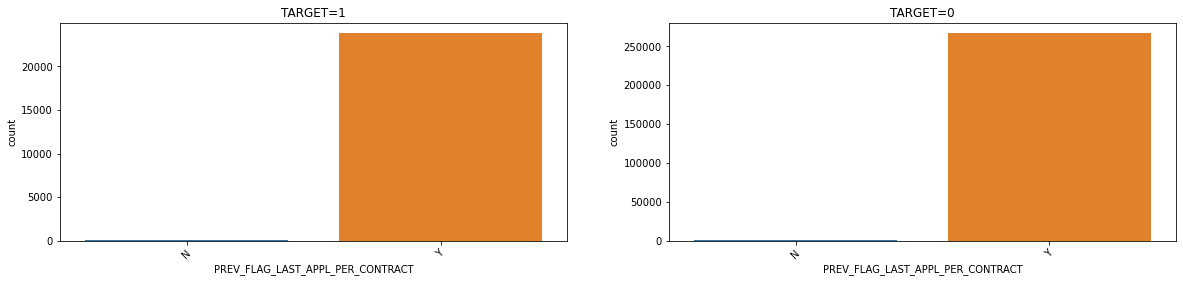

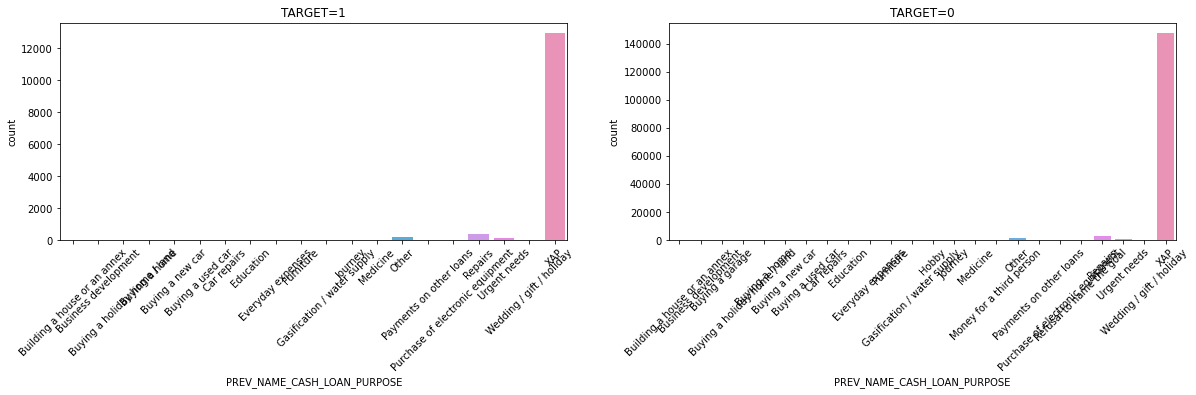

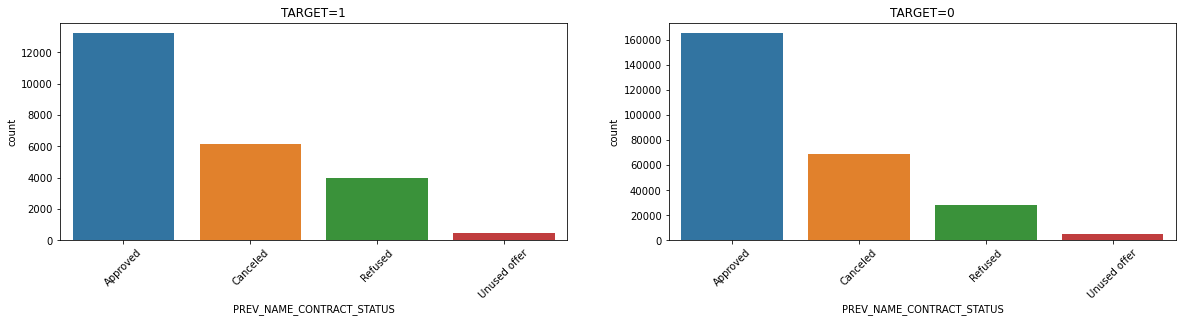

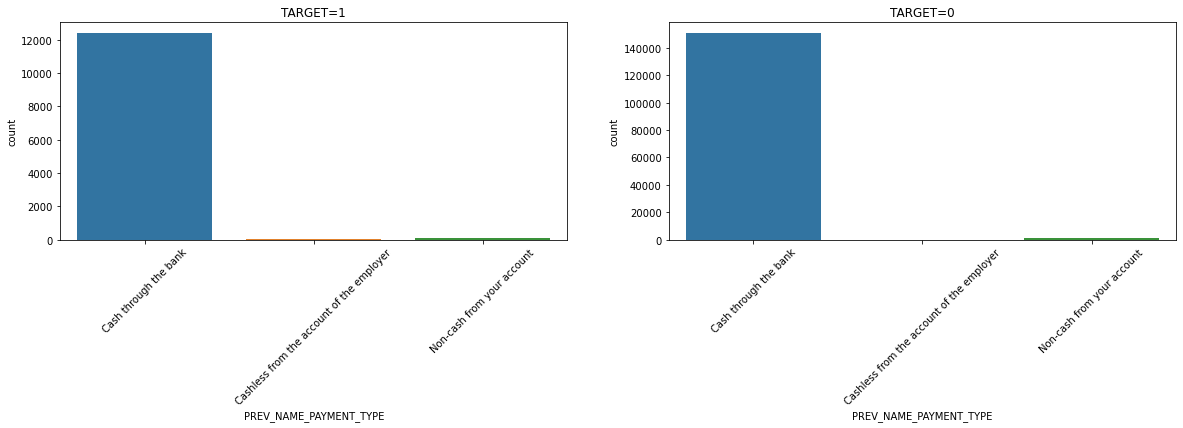

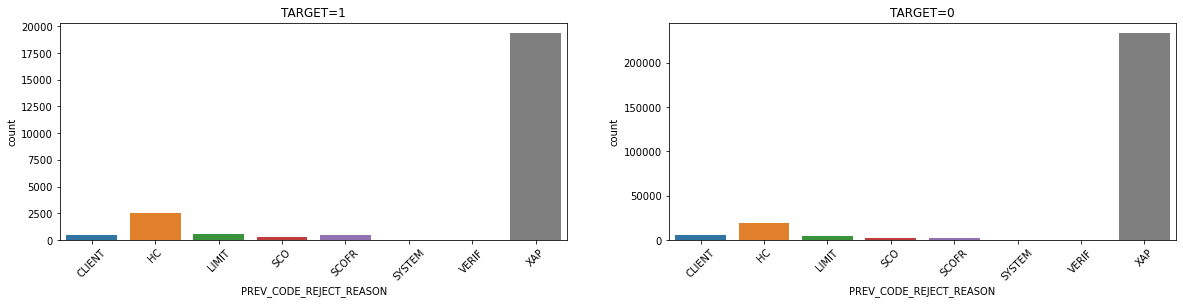

In [33]:
# univariate analysis for categorical variables
for col in prev_cat_cols:
    plt.figure(figsize = (20,4))
    plt.subplot(1,2,1)
    plt.title('TARGET=1')
    sns.countplot(df_data[df_data.TARGET==1][col].sort_values())
    plt.xticks(rotation=45)

    plt.subplot(1,2,2)
    plt.title('TARGET=0')
    sns.countplot(df_data[df_data.TARGET==0][col].sort_values())
    plt.xticks(rotation=45)
    plt.show()

#### INFERENCE - None of  selected 5 columns from previous data show any significant difference between TARGET classes.

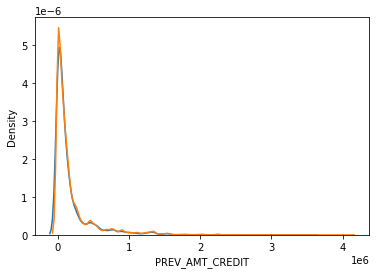

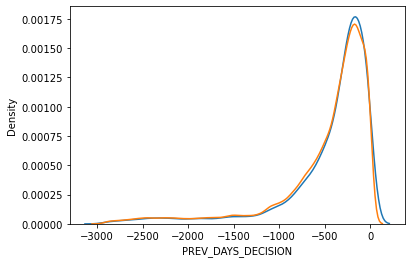

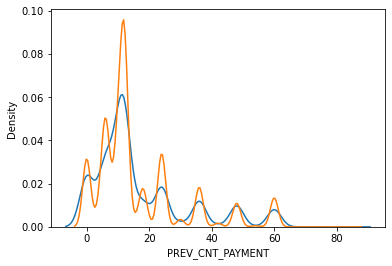

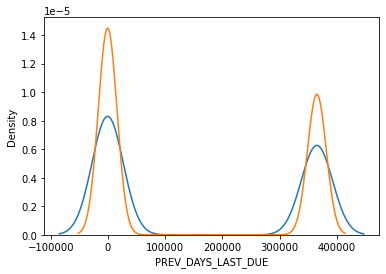

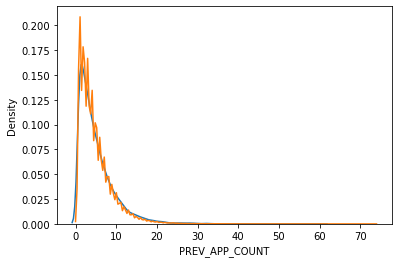

In [34]:
#Analysis for some continous variables
for col in prev_cont_cols:
    sns.distplot(df_data[df_data.TARGET==1][col], hist=False, label = 'TARGET=1')
    sns.distplot(df_data[df_data.TARGET==0][col], hist=False, label = 'TARGET=0')
    plt.show()

#### INFERENCE - Selected variables show very similar patterns for TARGET class 0 and 1, No special information can be gathered.

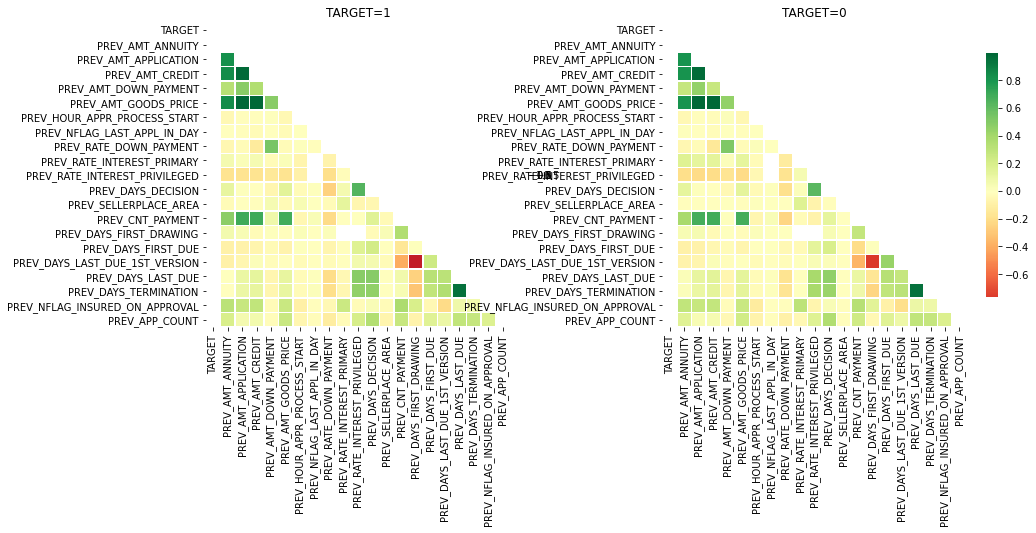

In [35]:
# Bivariate analysis on Continous-Continous Variables
corr0 = df_data[df_data.TARGET==0].corr()
corr1 = df_data[df_data.TARGET==1].corr()
mask = np.triu(np.ones_like(corr1, dtype=bool))

plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
plt.title("TARGET=1")
sns.heatmap(corr1, mask=mask, cmap='RdYlGn', center=0, square=True, linewidths=.5, cbar_kws={"shrink": 0})

plt.subplot(1,2,2)
plt.title("TARGET=0")
sns.heatmap(corr0, mask=mask, cmap='RdYlGn', center=0, square=True, linewidths=.5, cbar_kws={"shrink": 0.3})

plt.show()

#### INFERENCE - Variables PREV_AMT_ANNUITY, PREV_AMT_APPLICATION, PREV_AMT_CREDIT, PREV_AMOUNT_GOODS_PRICE show high correlations, but this is similar to what is observered in current application data as well. The new created variable PREV_APP_COUNT does not show any string correlation as well.

### Step 9.  Final List of 15 Important selected variables based on analysis above
- CODE_GENDER
- FLAG_OWN_CAR
- NAME_INCOME_TYPE
- FLAG_EMP_PHONE
- REG_CITY_NOT_LIVE_CITY
- DAYS_BIRTH
- AMT_CREDIT
- AMT_ANNUITY
- AMT_GOODS_PRICE
- DAYS_EMPLOYED
- DAYS_BIRTH
- CNT_FAM_MEMBERS
- CNT_CHILDREN
- DAYS_EMPLOYED
- DAYS_REGISTRATION